In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 672.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.2 MB/s eta 0:00:00
   ━━

In [ ]:
# Use Local drives to upload the csv on google colab
from google.colab import files
uploaded = files.upload()

Saving creditData_cleaned.csv to creditData_cleaned.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
import io
import os
import sys

In [ ]:
creditData = pd.read_csv(io.BytesIO(uploaded['creditData_cleaned.csv']))

In [ ]:
from pycaret.classification import *

# Load the data into a Pandas DataFrame
df = pd.read_csv('creditData_cleaned.csv')

In [ ]:
df.head()

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,0,< 0 DM,6,1,furniture/appliances,1169,-1,5,4,4,67,none,own,2,3,1,2,0
1,1,1 - 200 DM,48,3,furniture/appliances,5951,1,3,2,2,22,none,own,1,3,1,1,1
2,2,unknown,12,1,education,2096,1,4,2,3,49,none,own,1,2,2,1,0
3,3,< 0 DM,42,3,furniture/appliances,7882,1,4,2,4,45,none,other,1,3,2,1,0
4,4,< 0 DM,24,2,car,4870,1,3,3,4,53,none,other,2,3,2,1,1


### Data Preaparation for Modeling



In [ ]:
import pandas as pd

# Rename the feature columns
df = df.rename(columns=lambda x: x.replace('[', '_').replace(']', '_').replace('<', '_'))


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# This model will be used to compare all the model along with the cross validation
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7600,0.7654,0.4095,0.6707,0.5024,0.3577,0.3794,0.6810
gbc,Gradient Boosting Classifier,0.7571,0.7728,0.4714,0.6287,0.5315,0.3748,0.3850,0.5190
lr,Logistic Regression,0.7557,0.7655,0.4619,0.6379,0.5268,0.3698,0.3831,1.3550
lda,Linear Discriminant Analysis,0.7514,0.7600,0.4571,0.6315,0.5199,0.3600,0.3740,0.2250
et,Extra Trees Classifier,0.7500,0.7362,0.4524,0.6097,0.5133,0.3528,0.3625,0.8960
ridge,Ridge Classifier,0.7486,0.0000,0.4286,0.6322,0.5002,0.3427,0.3595,0.3250
lightgbm,Light Gradient Boosting Machine,0.7443,0.7394,0.4571,0.6001,0.5130,0.3460,0.3543,0.3840
ada,Ada Boost Classifier,0.7229,0.7169,0.4381,0.5398,0.4808,0.2966,0.3003,0.6830
nb,Naive Bayes,0.7171,0.7430,0.5000,0.5400,0.5157,0.3170,0.3199,0.2110
dt,Decision Tree Classifier,0.7029,0.6571,0.5429,0.5078,0.5224,0.3079,0.3098,0.2120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6536, verbose=0, warm_start=False)

## Creating a Random Forest

In [ ]:
rf_classifier=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8143,0.8382,0.4762,0.8333,0.6061,0.4961,0.5294
1,0.7714,0.7498,0.5238,0.6471,0.5789,0.4245,0.4289
2,0.7429,0.7488,0.4286,0.6000,0.5000,0.3333,0.3419
3,0.8286,0.8542,0.4762,0.9091,0.6250,0.5276,0.5739
4,0.7429,0.8197,0.4286,0.6000,0.5000,0.3333,0.3419
5,0.7571,0.7745,0.4286,0.6429,0.5143,0.3609,0.3741
6,0.7000,0.5986,0.2381,0.5000,0.3226,0.1600,0.1782
7,0.7571,0.8047,0.2857,0.7500,0.4138,0.2975,0.3527
8,0.7429,0.7245,0.4762,0.5882,0.5263,0.3525,0.3562


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
dt_classifier=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.6599,0.5238,0.5238,0.5238,0.3197,0.3197
1,0.7286,0.6837,0.5714,0.5455,0.5581,0.3624,0.3626
2,0.7000,0.6497,0.5238,0.5000,0.5116,0.2953,0.2955
3,0.7286,0.6837,0.5714,0.5455,0.5581,0.3624,0.3626
4,0.6571,0.6190,0.5238,0.4400,0.4783,0.2258,0.2277
5,0.7143,0.6735,0.5714,0.5217,0.5455,0.3377,0.3385
6,0.6714,0.6020,0.4286,0.4500,0.4390,0.2069,0.2070
7,0.7429,0.6667,0.4762,0.5882,0.5263,0.3525,0.3562
8,0.7143,0.7007,0.6667,0.5185,0.5833,0.3711,0.3779


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning Hyper Parameters for better Performance

In [ ]:
tuned_rf_classifier=tune_model(rf_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7429,0.6895,0.3333,0.6364,0.4375,0.2913,0.3169
1,0.6714,0.7065,0.3333,0.4375,0.3784,0.1606,0.1633
2,0.7000,0.6633,0.4286,0.5000,0.4615,0.2553,0.2568
3,0.7000,0.7046,0.4286,0.5000,0.4615,0.2553,0.2568
4,0.7286,0.6764,0.6190,0.5417,0.5778,0.3791,0.3809
5,0.7286,0.7974,0.4286,0.5625,0.4865,0.3066,0.3118
6,0.6571,0.6336,0.2381,0.3846,0.2941,0.0840,0.0882
7,0.7714,0.7094,0.3333,0.7778,0.4667,0.3496,0.4005
8,0.7571,0.7580,0.5714,0.6000,0.5854,0.4138,0.4140


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_dt_classifier=tune_model(dt_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.7721,0.3333,1.0000,0.5000,0.4118,0.5092
1,0.7286,0.6409,0.1429,0.7500,0.2400,0.1593,0.2417
2,0.7000,0.7182,0.4286,0.5000,0.4615,0.2553,0.2568
3,0.6857,0.7225,0.1905,0.4444,0.2667,0.1057,0.1211
4,0.6857,0.6662,0.4762,0.4762,0.4762,0.2517,0.2517
5,0.7000,0.7191,0.2857,0.5000,0.3636,0.1860,0.1985
6,0.7571,0.6851,0.4762,0.6250,0.5405,0.3796,0.3860
7,0.6571,0.6288,0.1429,0.3333,0.2000,0.0244,0.0279
8,0.7143,0.5841,0.2381,0.5556,0.3333,0.1870,0.2142


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Plotting Classification Plots

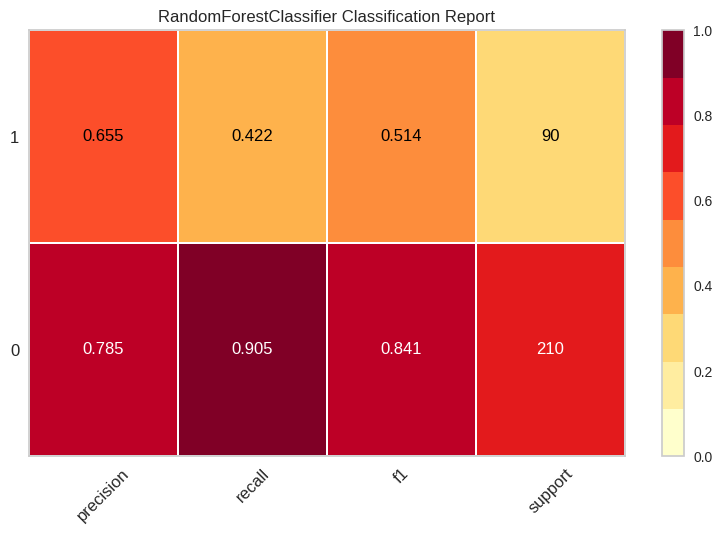

In [ ]:
plot_model(tuned_rf_classifier,plot='class_report')

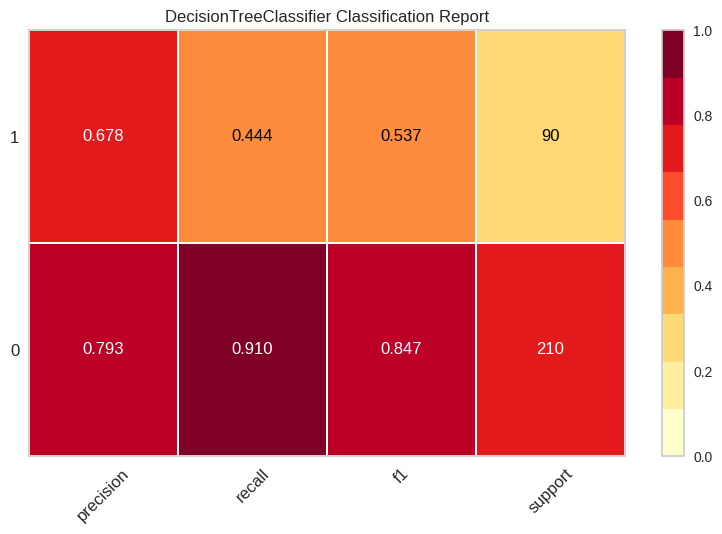

In [ ]:
plot_model(tuned_dt_classifier,plot='class_report')

## Plotting the Confusion Matrix

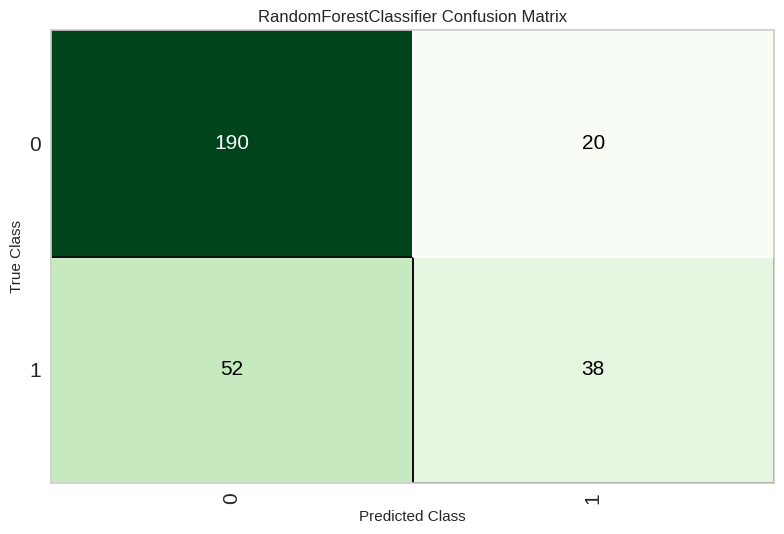

In [ ]:
plot_model(tuned_rf_classifier,plot='confusion_matrix')

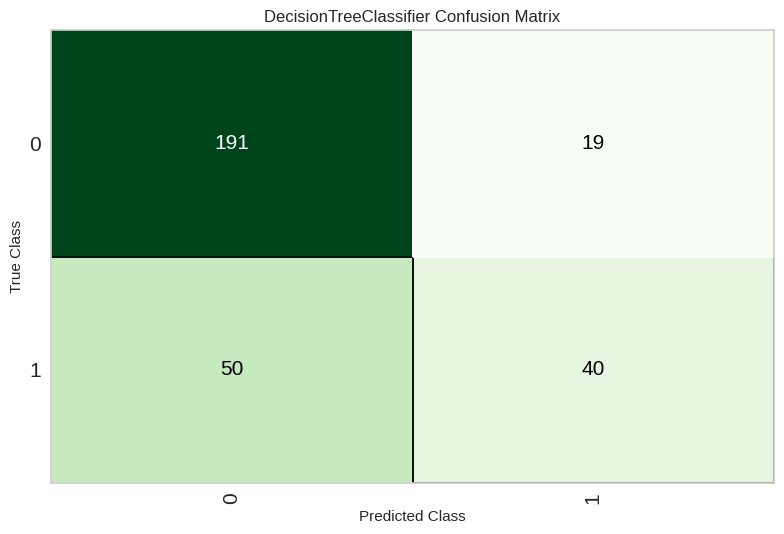

In [ ]:
plot_model(tuned_dt_classifier,plot='confusion_matrix')

Saving Model

In [ ]:
## This can be used to save our trained model for future use.
save_model(tuned_rf_classifier,"RF CLASSIFIER")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0',
                                              'months_loan_duration',
                                              'credit_history', 'amount',
                                              'savings_balance',
                                              'employment_duration',
                                              'percent_of_income',
                                              'years_at_residence', 'age',
                                              'existing_loans_count', 'job',
                                              'dependents', 'phone'],
                                     transformer=SimpleImputer(add_ind...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
        